In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


This notebook is dedicated to exploratory data analysis of Amazon books dataset. Below you can find top 50 bestselling books data between 2009 and 2019.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#Load the data
df=pd.read_csv("../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,550.0,4.618364,0.226980,3.3,4.5,4.7,4.80,4.9
Reviews,550.0,11953.281818,11731.132017,37.0,4058.0,8580.0,17253.25,87841.0
Price,550.0,13.100000,10.842262,0.0,7.0,11.0,16.00,105.0
Year,550.0,2014.000000,3.165156,2009.0,2011.0,2014.0,2017.00,2019.0


In [5]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
df.shape

(550, 7)

In [7]:
#checking if there are missing values
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

The data has no missing value.

In [8]:
#Dropping duplicate values
df.drop_duplicates(subset='Name', inplace=True)
df.shape

(351, 7)

In [9]:
#most reviewed books
top_10=df.sort_values("Reviews",ascending=False)[:10]
top_10

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction


<AxesSubplot:ylabel='Genre'>

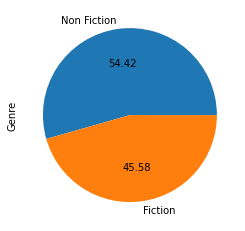

In [10]:
df["Genre"].value_counts().plot(kind="pie", autopct='%.2f',labels=df["Genre"].unique())

56.36% of the books are not fiction while 43.64 of them are fictions.

<AxesSubplot:xlabel='User Rating', ylabel='count'>

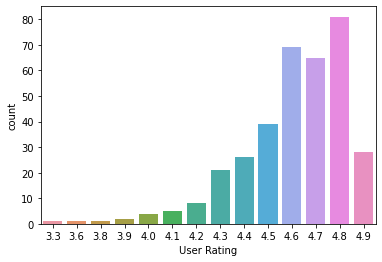

In [11]:
sns.countplot(x=df["User Rating"])

Most books are high-rated.

# Best Sellers Authors with the highest rate

In [12]:
best_sellers = df[df["User Rating"]==4.9]
best_sellers=best_sellers.groupby("Author")["User Rating"].mean().reset_index()
best_sellers

,Author,User Rating
0,Alice Schertle,4.9
1,Bill Martin Jr.,4.9
2,Brandon Stanton,4.9
3,Chip Gaines,4.9
4,Dav Pilkey,4.9
5,Dr. Seuss,4.9
6,Emily Winfield Martin,4.9
7,Eric Carle,4.9
8,J. K. Rowling,4.9
9,J.K. Rowling,4.9


I wonder if there is a correlation between user ratings-prices and user ratings-reviews.

In [13]:
cor_df=df.corr()
cor_df.loc["User Rating", "Price"]

-0.034787133322032926

there is no correlation between ratings and prices of the books.

In [14]:
cor_df.loc["User Rating", "Reviews"]

-0.055595314468530735

there is no correlation between ratings and reviews of the books either.

# Average price of the bestelling books between 2009-2019

In [15]:
p_mean=df.groupby("Year").mean()
p_mean['Year'] = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
p_mean.reset_index(drop=True, inplace=True)
p_mean

,User Rating,Reviews,Price,Year
0,4.584000,4710.120000,15.400000,2009
1,4.567500,5233.075000,13.275000,2010
2,4.532258,7292.774194,14.290323,2011
3,4.482143,14283.357143,14.321429,2012
4,4.587879,11280.303030,14.363636,2013
5,4.648148,11956.074074,12.148148,2014
6,4.623333,13206.433333,10.066667,2015
7,4.692857,9780.428571,14.892857,2016
8,4.655556,10865.666667,11.666667,2017
9,4.646667,12646.033333,10.366667,2018


<AxesSubplot:xlabel='Year', ylabel='Price'>

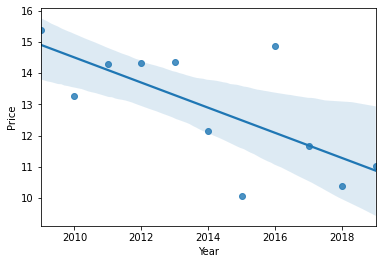

In [16]:
sns.regplot(x="Year", y="Price",data=p_mean)

looking at the regression plot, average price for bestselling books is falling over year by year.

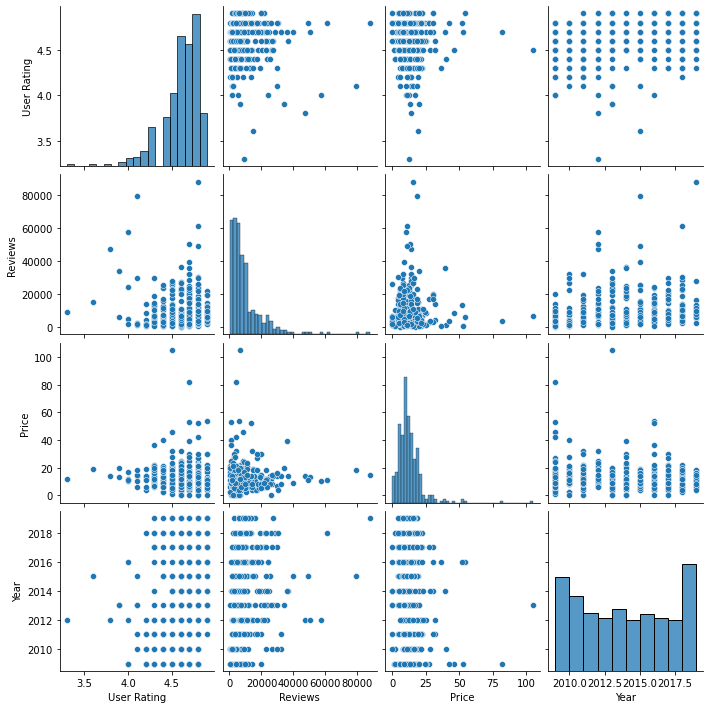

In [17]:
sns.pairplot(df)

The pairplot shows us that there is not really any correlation between variables.